<h1 style='color: blue; font-size: 36px; font-weight: bold;'>TECH CHALLENGE - FASE 1 - STORYTELLING</h1>

# O Problema

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Esta é a primeira fase do projeto Pós-Graduação Tech em Data Analytics da FIAP. Nesta primeira fase, iremos atuar como Especialistas em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Esta é uma área recém-criada dentro da empresa, e nós seremos responsáveis pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas. Devemos explicar a quantidade de vinhos exportados e descrever os fatores externos que podem vir a surgir e que interferem nas análises, como por exemplo, dados demográficos e econômicos.

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nosso objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações.

# Obtenção dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os dados que serão utilizados nesta primeira fase foram extraídos do site da Embrapa, uma vinícula parceira. O arquivo possui os dados de exportação de vinhos de 1970 até 2022.

# Apresentação dos Dados

## Importanto Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

import datetime

sns.set_theme(style='white')
%matplotlib inline

In [2]:
dados = pd.read_csv('Dados_Exportacao_Vinhos\ExpVinho.csv', sep=';')
dados

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,125,Uruguai,0,0,0,0,0,0,0,0,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,126,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,127,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,71,355,0,0,4086,9808,26415,35944,23220,32351


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Neste arquivos nós temos a coluna de <b>Id</b> que identifica os países. A coluna <b>País</b> que apresenta o nome do País de destino da exportação, e, para cada ano temos duas colunas, uma com quantidade em Kg e a segunda com o valor em US$. Nós iremos considerar neste caso que 1Kg = 1L, assim teremos o montante total de litros de vinho exportado.

# Tratamento dos dados

## Resetar Índice

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos organizar melhor o DataFrame, primeiro utilizando a coluna País como o nosso índice.

In [3]:
dados = dados.set_index('País')
dados.head()

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,2,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",3,0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,4,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Selecionar os 15 Últimos Anos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Faremos um slicing do nosso DataFrame pegando os 15 últimos anos pois esse é o nosso universo de estudo. Como temos duas colunas para cada ano, ao final teremos apenas 30 colunas.

In [4]:
# Slicing para obter os anos de 2008 até 2022 (15 anos)
dados = dados.iloc[:, -30:]
dados

,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
Uruguai,0,0,0,0,914,2929,1238,4404,1135,3879,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0


## Melt do DataFrame

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora com os anos selecionados vamos rearranjar nosso DataFrame para que tenhamos um formato melhor para manipular os dados.

In [5]:
dados = dados.T
dados.reset_index(inplace=True)
dados = dados.melt(id_vars=['index'], value_vars=dados.columns)
dados

,index,País,value
0,2008,Afeganistão,0
1,2008.1,Afeganistão,0
2,2009,Afeganistão,0
3,2009.1,Afeganistão,0
4,2010,Afeganistão,0
...,...,...,...
3835,2020.1,Vietnã,584
3836,2021,Vietnã,0
3837,2021.1,Vietnã,0
3838,2022,Vietnã,130


## Inserir Colunas com as Unidades em Litros e US$

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos inserir uma coluna com as unidades dos valores que estamos trabalhando. Para isso, iremos transpor nosso DataFrame, assim teremos os anos no índice e os países nas colunas. Após isso mapearemos o índice verificando o comprimento pois o padrão é fácil de ser indentificado. Assim, quando o comprimento for igual a 4, temos o valor em litros de vinho, quando for diferente, temos o valor em US$.

In [6]:
dados['Unidade'] = dados['index'].map(lambda x:'L' if len(x) == 4 else 'US$')
dados.head()

,index,País,value,Unidade
0,2008,Afeganistão,0,L
1,2008.1,Afeganistão,0,US$
2,2009,Afeganistão,0,L
3,2009.1,Afeganistão,0,US$
4,2010,Afeganistão,0,L


## Corrigindo a Descrição do Ano

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Da mesma forma, corrigiremos a descrição dos anos retirando o sulfixo ".1"

In [7]:
dados['Ano'] = dados['index'].map(lambda x: x if len(x) == 4 else x.split('.')[0])
dados = dados.drop(columns='index')
dados.head()

,País,value,Unidade,Ano
0,Afeganistão,0,L,2008
1,Afeganistão,0,US$,2008
2,Afeganistão,0,L,2009
3,Afeganistão,0,US$,2009
4,Afeganistão,0,L,2010


## Gerando o DataFrame Final

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O ideal seria termos duas colunas, uma para cada unidade de medida, então vamos quebrar nosso DataFrame em dois. Um com apenas os valores em litros e outro com os valores em US$. Como estamos lidando o mesmo número de países e anos para ambas as seleções deveremos ter o mesmo shape.

In [8]:
dados_L = dados[dados['Unidade'] == 'L']
dados_L.shape

(1920, 4)

In [9]:
dados_US = dados[dados['Unidade'] == 'US$']
dados_US.shape

(1920, 4)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Por motivos de regra de negócio, consideraremos os Países Baixos como Holanda, e renomearemos Alemanha, República Democrática apenas para Alemanha. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Após essa alteração, podemos unir ambas as partes em uma só, e ordenar da forma que queremos.

In [10]:
dados_final = pd.merge(dados_L, dados_US, on=['País', 'Ano'], suffixes=('_L', '_US$'))
dados_final = dados_final.drop(columns=['Unidade_L', 'Unidade_US$'])
dados_final['País_Origem'] = 'Brasil'
dados_final.columns=['País_Destino', 'Valor_L', 'Ano', 'Valor_US$', 'País_Origem']
dados_final['País_Destino'].replace({'Países Baixos':'Holanda', 'Alemanha, República Democrática':'Alemanha'}, inplace=True)
dados_final = dados_final[['Ano', 'País_Origem', 'País_Destino', 'Valor_L', 'Valor_US$']]
dados_final

,Ano,País_Origem,País_Destino,Valor_L,Valor_US$
0,2008,Brasil,Afeganistão,0,0
1,2009,Brasil,Afeganistão,0,0
2,2010,Brasil,Afeganistão,0,0
3,2011,Brasil,Afeganistão,0,0
4,2012,Brasil,Afeganistão,0,0
...,...,...,...,...,...
1915,2018,Brasil,Vietnã,0,0
1916,2019,Brasil,Vietnã,20,32
1917,2020,Brasil,Vietnã,86,584
1918,2021,Brasil,Vietnã,0,0


In [11]:
dados_final.to_csv('dados_final.csv',index=False)

## Alterando o Tipo dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Antes de iniciarmos nossas análises, um último tratamento para verificar os tipos dos dados e alterar onde é necessário.

In [12]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           1920 non-null   object
 1   País_Origem   1920 non-null   object
 2   País_Destino  1920 non-null   object
 3   Valor_L       1920 non-null   int64 
 4   Valor_US$     1920 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.0+ KB


In [13]:
dados_final['Ano'] = pd.to_datetime(dados_final['Ano']).dt.year

In [14]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           1920 non-null   int64 
 1   País_Origem   1920 non-null   object
 2   País_Destino  1920 non-null   object
 3   Valor_L       1920 non-null   int64 
 4   Valor_US$     1920 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 90.0+ KB


In [15]:
dados_final.head()

,Ano,País_Origem,País_Destino,Valor_L,Valor_US$
0,2008,Brasil,Afeganistão,0,0
1,2009,Brasil,Afeganistão,0,0
2,2010,Brasil,Afeganistão,0,0
3,2011,Brasil,Afeganistão,0,0
4,2012,Brasil,Afeganistão,0,0


# Análise Exploratória dos Dados

## Verificação de Missing Values

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos verificar a presença de algum valor que pode estar nulo, ou NaN. Como esta base foi fornecida diretamente pela vinícula parceira, a Embrapa, provavelmente está previamente tratada, mas de qualquer forma é bom verificar.

In [16]:
dados_final.isnull().sum()

Ano             0
País_Origem     0
País_Destino    0
Valor_L         0
Valor_US$       0
dtype: int64

In [17]:
dados_final.isna().sum()

Ano             0
País_Origem     0
País_Destino    0
Valor_L         0
Valor_US$       0
dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como desconfiávamos, não há missing values.

## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora vamos verificar as estatísticas descritivas da nossa base, assim teremos uma noção melhor de como os dados estão se comportando.

In [18]:
dados_final[['Valor_L', 'Valor_US$']].describe().round(2)

,Valor_L,Valor_US$
count,1920.00,1920.00
mean,45824.18,58668.91
std,598815.48,498786.26
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1006.25,4000.50
max,21912914.00,14795694.00


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Alguns pontos que são interessantes destacar:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>O desvio padrão é muito alto, o que pode indicar a presença de outliers</li>
<li>Todos os nossos dados estão presentes no terceiro quartil</li>
<li>A amplitude entre o valor máximo e mínimo é muito grande, o que pode influenciar em muito a média</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos agrupar o DataFrame por país e somar as quantidades, provavelmente existem muitos zeros.

In [19]:
agrupado_por_pais = dados_final.groupby(['País_Destino'])[['Valor_L', 'Valor_US$']].sum()
agrupado_por_pais

,Valor_L,Valor_US$
País_Destino,,
Afeganistão,11,46
Alemanha,909051,2546394
Angola,168868,576189
Anguilla,0,0
Antilhas Holandesas,97002,142915
...,...,...
Vanuatu,18,31
Venezuela,55515,88828
Vietnã,9799,13013


In [20]:
agrupado_por_pais.value_counts()

Valor_L   Valor_US$
0         0            11
24668     53789         1
66529     356395        1
62156     162516        1
55515     88828         1
                       ..
615       2552          1
585       16063         1
425       1962          1
387       3723          1
39029799  25504484      1
Length: 118, dtype: int64

In [21]:
zero_consumo = agrupado_por_pais.value_counts()[0][0]
num_paises = agrupado_por_pais.shape[0]

print(f'11 Países de 128 não consumiram nada nos últimos 15 anos. Um total de: {round(zero_consumo / num_paises * 100, 2)} %')

11 Países de 128 não consumiram nada nos últimos 15 anos. Um total de: 8.59 %


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Não parece ser tão significante o percentual de países que não consumiram nos últimos 15 anos.

## Montante de Venda de Exportação nos Últimos 15 Anos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos começar calculando os montantes totais por ano de exportação, tanto em litros quanto em dólar.    

In [22]:
total_de_exportacao_vinhos = dados_final.groupby('Ano').sum().reset_index()
total_de_exportacao_vinhos

,Ano,Valor_L,Valor_US$
0,2008,10346323,7118100
1,2009,25514198,8940988
2,2010,1280574,2595303
3,2011,1214834,3615120
4,2012,5775376,5521293
5,2013,9149059,22744845
6,2014,2324029,7472795
7,2015,1198479,2769160
8,2016,1786549,4434704
9,2017,2889572,7135607


In [23]:
maior_valor_exportacao = total_de_exportacao_vinhos['Valor_US$'].max()
menor_valor_exportacao = total_de_exportacao_vinhos['Valor_US$'].min()

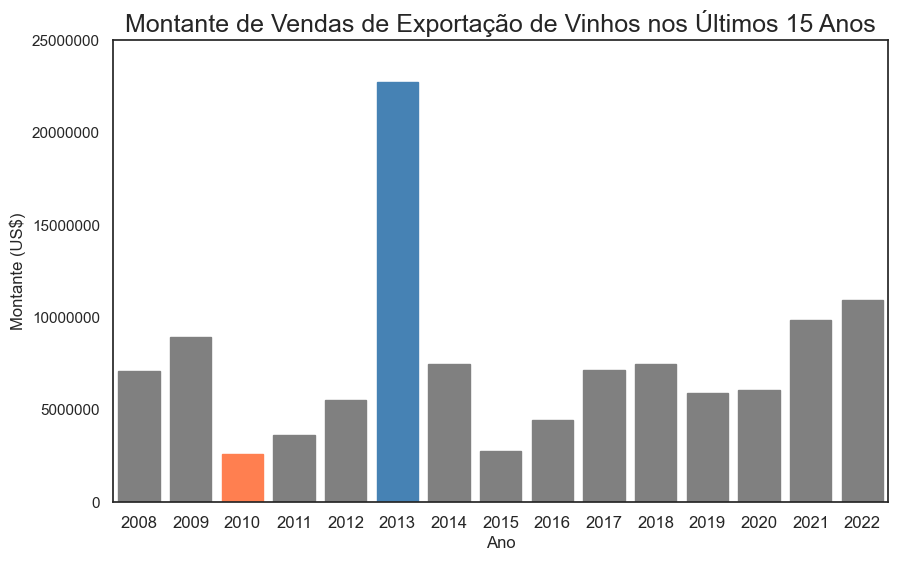

In [24]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=total_de_exportacao_vinhos, x='Ano', y='Valor_US$')
for bar in ax.patches:
    if bar.get_height() == maior_valor_exportacao:
        bar.set_color('steelblue')    
    elif bar.get_height() == menor_valor_exportacao:
        bar.set_color('coral')
    else:
        bar.set_color('gray')

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
ax.set_yticks(ticks = ytick_loc, fontsize = 12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Montante (US$)', fontsize = 12)
ax.set_title('Montante de Vendas de Exportação de Vinhos nos Últimos 15 Anos', fontsize = 18, horizontalalignment = "center")

plt.show()

## Montante em Litros Exportado nos Últimos 15 Anos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora plotaremos o montante em litros exportado. 

In [25]:
maior_valor_exportacao_l = total_de_exportacao_vinhos['Valor_L'].max()
menor_valor_exportacao_l = total_de_exportacao_vinhos['Valor_L'].min()

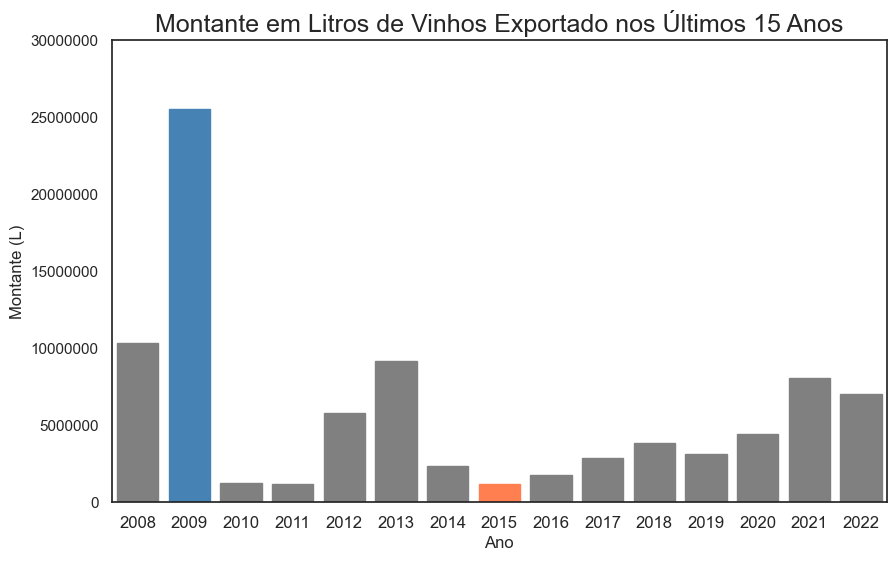

In [26]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=total_de_exportacao_vinhos, x='Ano', y='Valor_L')
for bar in ax.patches:
    if bar.get_height() == maior_valor_exportacao_l:
        bar.set_color('steelblue')    
    elif bar.get_height() == menor_valor_exportacao_l:
        bar.set_color('coral')
    else:
        bar.set_color('gray')

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
ax.set_yticks(ticks = ytick_loc, fontsize = 12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Montante (L)', fontsize = 12)
ax.set_title('Montante em Litros de Vinhos Exportado nos Últimos 15 Anos', fontsize = 18, horizontalalignment = "center")

plt.show()

## Top 10 Países Consumidores de Vinho nos Últimos 15 Anos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nós temos em nossa base 128 países de destino, vamos avaliar os 10 maiores consumidores nos últimos 15 anos e sua representatividade dentro da receita total, assim teremos uma noção melhor de quais países de destino devemos dar mais atenção.

### Total de Importação - Montante em US$

In [27]:
top_10_paises_montante_uss = agrupado_por_pais.sort_values(by=['Valor_US$'], ascending=True)
top_10_paises_montante_uss = top_10_paises_montante_uss[-10:].reset_index().sort_values(by=['Valor_US$'], ascending=False)
top_10_paises_montante_uss

,País_Destino,Valor_L,Valor_US$
9,Paraguai,29214770,38719031
8,Rússia,39029799,25504484
7,Estados Unidos,3563355,9684567
6,China,2509458,4746525
5,Reino Unido,1239551,4711464
4,Espanha,1993000,3808552
3,Holanda,1236154,3791611
2,Alemanha,909051,2546394
1,Japão,1181692,2377716
0,Haiti,1791603,2327208


In [28]:
maior_valor_paises_montante_uss = top_10_paises_montante_uss['Valor_US$'].max()
menor_valor_paises_montante_uss = top_10_paises_montante_uss['Valor_US$'].min()

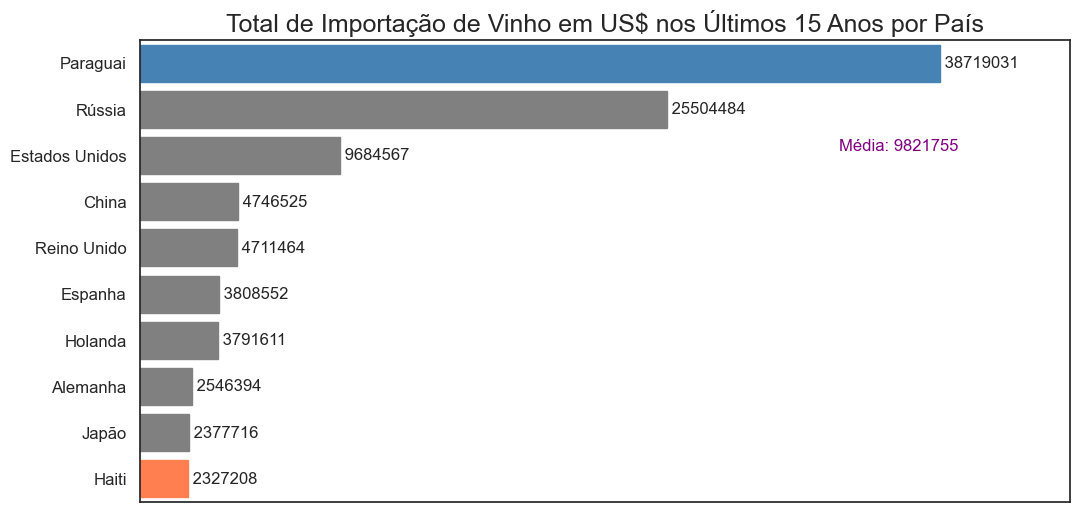

In [29]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=top_10_paises_montante_uss, y='País_Destino', x='Valor_US$', orient='h')
for bar in ax.patches:
    if bar.get_width() == maior_valor_paises_montante_uss:
        bar.set_color('steelblue')    
    elif bar.get_width() == menor_valor_paises_montante_uss:
        bar.set_color('coral')
    else:
        bar.set_color('gray')
                
plt.text(x = top_10_paises_montante_uss['Valor_US$'].mean()+24000000, # coordenada x 
 y = max([h.get_height() for h in ax.patches])+1.1, # coordenada y 
 s = 'Média: {:.0f}'.format(top_10_paises_montante_uss['Valor_US$'].mean()), # rótulo
 color='purple') # cor do rótulo

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_yticks(ticks = ytick_loc, labels = ytick_labels, fontsize = 12)
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)

ax.bar_label(ax.containers[0], fontsize=12, fmt=' %.f')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total de Importação de Vinho em US$ nos Últimos 15 Anos por País', fontsize = 18, horizontalalignment = "center")

plt.show()

In [30]:
soma_todos_paises = agrupado_por_pais['Valor_US$'].sum()
soma_top_10_paises_montante_uss = top_10_paises_montante_uss['Valor_US$'].sum()

representatividade = round(soma_top_10_paises_montante_uss / soma_todos_paises * 100, 2)

print(f'10 Países de 128 representam {representatividade}% do montante em dólar de importação nos últimos 15 anos')

10 Países de 128 representam 87.19% do montante em dólar de importação nos últimos 15 anos


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como podemos observar, aproximadamente 87% do total exportado está concentrado em 10 países. Desses 10 países, o Paraguai se destaca como o maior consumidor de vinho nos últimos 15 anos. Existem alguns motivos que podemos destacar como por exemplo, o fato de ambos, Brasil e Paraguai, pertenceram ao mesmo bloco econômico, o Mercosul. A formação deste bloco permite a livre circulação de bens, serviços e fatores produtivos entre os países, eliminando os direitos alfandegários e restrições não-tarifárias à circulação de mercadorias ou qualquer outra medida de efeito similar. Outro bom motivo é a vantagem geográfica, o Paraguai se localiza perto do Brasil, o que facilita o transporte terrestre que em geral é mais barato que o aquático ou aéreo. E um terceiro motivo é que o Paraguai não é um grande produtor de vinhos por si só.

### Total de Importação - Montante em L

In [31]:
top_10_paises_montante_l = agrupado_por_pais.sort_values(by=['Valor_L'], ascending=True)
top_10_paises_montante_l = top_10_paises_montante_l[-10:].reset_index().sort_values(by=['Valor_L'], ascending=False)
top_10_paises_montante_l

,País_Destino,Valor_L,Valor_US$
9,Rússia,39029799,25504484
8,Paraguai,29214770,38719031
7,Estados Unidos,3563355,9684567
6,China,2509458,4746525
5,Espanha,1993000,3808552
4,Haiti,1791603,2327208
3,Reino Unido,1239551,4711464
2,Holanda,1236154,3791611
1,Japão,1181692,2377716
0,Alemanha,909051,2546394


In [32]:
maior_valor_paises_montante_l = top_10_paises_montante_l['Valor_L'].max()
menor_valor_paises_montante_l = top_10_paises_montante_l['Valor_L'].min()

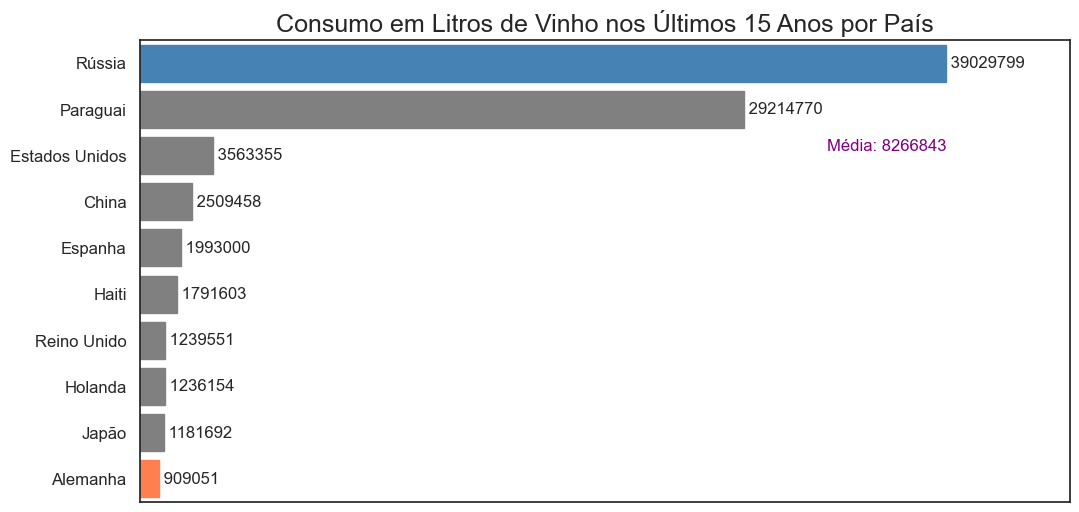

In [33]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=top_10_paises_montante_l, y='País_Destino', x='Valor_L', orient='h')
for bar in ax.patches:
    if bar.get_width() == maior_valor_paises_montante_l:
        bar.set_color('steelblue')    
    elif bar.get_width() == menor_valor_paises_montante_l:
        bar.set_color('coral')
    else:
        bar.set_color('gray')
        
plt.text(x = top_10_paises_montante_l['Valor_L'].mean()+25000000, # coordenada x 
 y = max([h.get_height() for h in ax.patches])+1.1, # coordenada y 
 s = 'Média: {:.0f}'.format(top_10_paises_montante_l['Valor_L'].mean()), # rótulo
 color='purple') # cor do rótulo

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_yticks(ticks = ytick_loc, labels = ytick_labels, fontsize = 12)
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)

ax.bar_label(ax.containers[0], fontsize=12, fmt=' %.f')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Consumo em Litros de Vinho nos Últimos 15 Anos por País', fontsize = 18, horizontalalignment = "center")

plt.show()

In [34]:
soma_todos_paises = agrupado_por_pais['Valor_L'].sum()
soma_top_10_paises_montante_l = top_10_paises_montante_uss['Valor_L'].sum()

representatividade = round(soma_top_10_paises_montante_l / soma_todos_paises * 100, 2)

print(f'10 Países de 128 representam {representatividade}% do montante em litros de importação nos últimos 15 anos')

10 Países de 128 representam 93.96% do montante em litros de importação nos últimos 15 anos


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Aproximadamente 94% do consumo total em litros de vinhos nos últimos 15 anos estão em mãos desses 10 países. A Rússia lidera o ranking como o maior consumidor de litros de vinho e a Alemanha é o menor consumidor. O Paraguai apesar de ter o montante maior de exportação em dólares, fica em segundo lugar para o consumo em litros de vinho.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Tirando o Paraguai, Rússia, EUA e China estão entre os maiores consumidores em litros de vinho e ao mesmo tempo fazem parte dos 10 países mais populosos do mundo, então um possível motivo para o alto consumo em litros de vinho seja a grande população desses países.

### Relação US$ por L

In [35]:
top_10_paises_montante_uss['US$_por_L'] = top_10_paises_montante_uss['Valor_US$'] / top_10_paises_montante_uss['Valor_L']
top_10_paises_montante_uss_l = top_10_paises_montante_uss.sort_values(by=['US$_por_L'], ascending=False)
top_10_paises_montante_uss_l 

,País_Destino,Valor_L,Valor_US$,US$_por_L
5,Reino Unido,1239551,4711464,3.800944
3,Holanda,1236154,3791611,3.067264
2,Alemanha,909051,2546394,2.801156
7,Estados Unidos,3563355,9684567,2.717823
1,Japão,1181692,2377716,2.012128
4,Espanha,1993000,3808552,1.910964
6,China,2509458,4746525,1.891454
9,Paraguai,29214770,38719031,1.325324
0,Haiti,1791603,2327208,1.298953
8,Rússia,39029799,25504484,0.653462


In [36]:
maior_valor_paises_montante_uss_l = top_10_paises_montante_uss_l['US$_por_L'].max()
menor_valor_paises_montante_uss_l = top_10_paises_montante_uss_l['US$_por_L'].min()

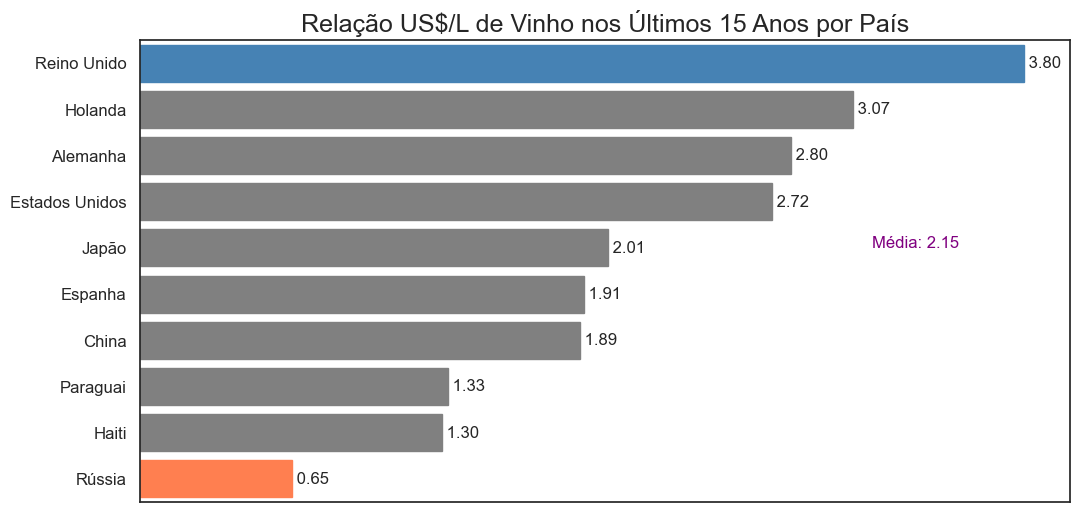

In [37]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=top_10_paises_montante_uss_l, y='País_Destino', x='US$_por_L', orient='h')
for bar in ax.patches:
    if bar.get_width() == maior_valor_paises_montante_uss_l:
        bar.set_color('steelblue')    
    elif bar.get_width() == menor_valor_paises_montante_uss_l:
        bar.set_color('coral')
    else:
        bar.set_color('gray')
        
plt.text(x = top_10_paises_montante_uss_l['US$_por_L'].mean()+1, # coordenada x 
 y = max([h.get_height() for h in ax.patches])+3.2, # coordenada y 
 s = 'Média: {:.2f}'.format(top_10_paises_montante_uss_l['US$_por_L'].mean()), # rótulo
 color='purple') # cor do rótulo

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_yticks(ticks = ytick_loc, labels = ytick_labels, fontsize = 12)
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)

ax.bar_label(ax.containers[0], fontsize=12, fmt=' %.2f')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Relação US$/L de Vinho nos Últimos 15 Anos por País', fontsize = 18, horizontalalignment = "center")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    É interessante destacar que o topo do gráfico é ocupado por trê spaíses Europeus, o que faz sentido quando avaliamos a distância entre o Brasil e esses países e o quanto isso poderia encarecer o custo da exportação. Entretanto, a Rússia é o país que possui a menor taxa US$/L, como vimos no gráfico anterior ela é o país que mais consumiu vinhos nos últimos 15 anos em termos de volume em litros.

## O Impacto da Exportação de Vinho no Brasil

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O Brasil em 2022 foi considerado o décimo quinto maior produtor de vinhos do mundo. Vamos analisar a variação percentual do volume em litros exportado nos últimos 15 anos.

In [38]:
total_de_exportacao_vinhos.head()

,Ano,Valor_L,Valor_US$
0,2008,10346323,7118100
1,2009,25514198,8940988
2,2010,1280574,2595303
3,2011,1214834,3615120
4,2012,5775376,5521293


In [39]:
total_de_exportacao_vinhos['Valor_L_ano_anterior'] = total_de_exportacao_vinhos['Valor_L'].shift(1)
total_de_exportacao_vinhos['%_Valor_L'] = round((total_de_exportacao_vinhos['Valor_L'] - total_de_exportacao_vinhos['Valor_L_ano_anterior']) / total_de_exportacao_vinhos['Valor_L_ano_anterior'], 4) * 100 
total_de_exportacao_vinhos

,Ano,Valor_L,Valor_US$,Valor_L_ano_anterior,%_Valor_L
0,2008,10346323,7118100,NaN,NaN
1,2009,25514198,8940988,10346323.0,146.60
2,2010,1280574,2595303,25514198.0,-94.98
3,2011,1214834,3615120,1280574.0,-5.13
4,2012,5775376,5521293,1214834.0,375.40
5,2013,9149059,22744845,5775376.0,58.41
6,2014,2324029,7472795,9149059.0,-74.60
7,2015,1198479,2769160,2324029.0,-48.43
8,2016,1786549,4434704,1198479.0,49.07
9,2017,2889572,7135607,1786549.0,61.74


posx and posy should be finite values
posx and posy should be finite values


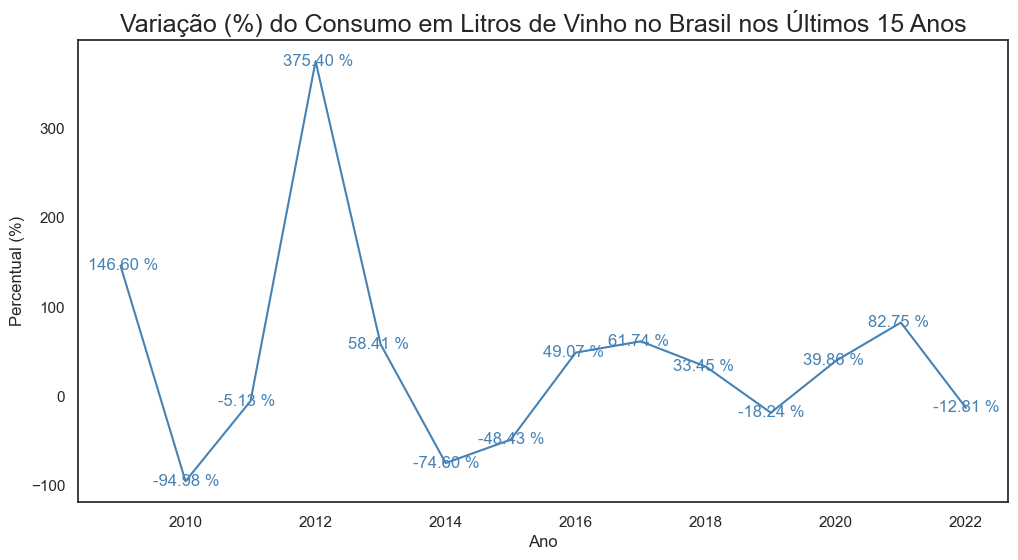

In [40]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=total_de_exportacao_vinhos, y='%_Valor_L', x='Ano', markers='o', color = 'steelblue')

for x, y in zip(total_de_exportacao_vinhos['Ano'], total_de_exportacao_vinhos['%_Valor_L']):
     plt.text(x = x-0.5, # coordenada x 
     y = y-5, # coordenada y
     s = '{:.2f} %'.format(y), # formatação do rótulo
     color = 'steelblue') # cor do rótulo

ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.set_title('Variação (%) do Consumo em Litros de Vinho no Brasil nos Últimos 15 Anos', fontsize = 18, horizontalalignment = "center")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Podemos observar dois grandes picos, em 2009 e em 2012. Anteriormente, vimos que a Rússia consumiu aproximadamente 5 vezes acima da média, vamos analisar esse país separadamente.

In [41]:
dados_ru = dados_final[dados_final['País_Destino'] == 'Rússia']
dados_ru

,Ano,País_Origem,País_Destino,Valor_L,Valor_US$
1575,2008,Brasil,Rússia,6207658,2352768
1576,2009,Brasil,Rússia,21912914,5732280
1577,2010,Brasil,Rússia,0,0
1578,2011,Brasil,Rússia,0,0
1579,2012,Brasil,Rússia,4528176,2103968
1580,2013,Brasil,Rússia,5893291,14795694
1581,2014,Brasil,Rússia,190656,61440
1582,2015,Brasil,Rússia,47664,18240
1583,2016,Brasil,Rússia,0,0
1584,2017,Brasil,Rússia,0,0


In [42]:
maior_valor_ru = dados_ru['Valor_L'].max()
menor_valor_ru = dados_ru['Valor_L'].min()

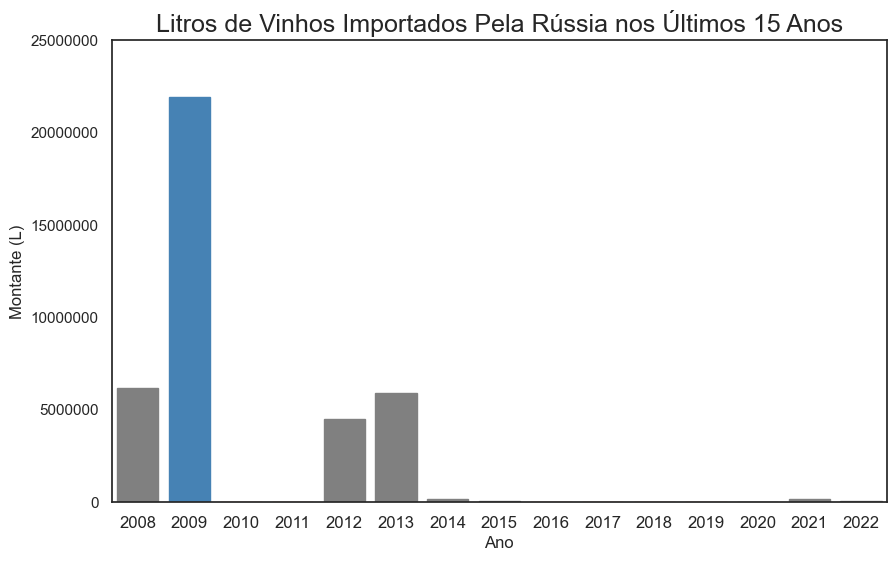

In [43]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=dados_ru, x='Ano', y='Valor_L')
for bar in ax.patches:
    if bar.get_height() == maior_valor_ru:
        bar.set_color('steelblue')    
    elif bar.get_height() == menor_valor_ru:
        bar.set_color('coral')
    else:
        bar.set_color('gray')

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
ax.set_yticks(ticks = ytick_loc, fontsize = 12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Montante (L)', fontsize = 12)
ax.set_title('Litros de Vinhos Importados Pela Rússia nos Últimos 15 Anos', fontsize = 18, horizontalalignment = "center")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    É interessante ver como a Rússia apenas no ano de 2009 consumiu mais do que a média de todos os 10 países nos últimos 15 anos e em alguns anos ela não teve nenhum consumo. Em 2012, a Rússia aumenta novamente muito o seu consumo em relação ao ano anterior (2011) onde não houve consumo. Isso mostra que a Rússia, apesar do alto consumo apresentado, ela não possui um padrão de consumo, mas apesar disso, quando ela consumiu, o valor foi alto.

## Novos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Iremos utilizar também dados demográficos dos países em estudo que foram obtidos pelo portal IBGE Países. O portal pode ser acessado por meio do link: https://paises.ibge.gov.br/#/mapa

### Dados Demográficos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Importaremos os arquivos com o dados demográficos dos mesmos países, porém usaremos apenas a população total como indicador principal.

In [44]:
lista_arquivos_pop = [arquivo for arquivo in os.listdir('./Dados_Demograficos')]

dados_pop = pd.DataFrame()

for arquivo in lista_arquivos_pop:
    df = pd.read_csv('./Dados_Demograficos/' + arquivo, sep=";")
    df = df.set_index(['País', 'Indicador'])
    df = df.loc[:, '2008':'2022'].reset_index()
    df = df[df['Indicador'] == 'População total']
    df = df.T
    df['País_Sigla'] = list(df.iloc[0])[0]
    df = df[2:].reset_index()
    df.columns=['Ano', 'Populacao_Total', 'País_Sigla']
    df['Populacao_Total'] = df['Populacao_Total'].astype(float)
    dados_pop = pd.concat([dados_pop, df])
    
dados_pop = dados_pop.reset_index(drop=True)    
dados_pop

,Ano,Populacao_Total,País_Sigla
0,2008,NaN,BR
1,2009,NaN,BR
2,2010,190755799.0,BR
3,2011,NaN,BR
4,2012,NaN,BR
...,...,...,...
160,2018,326838199.0,US
161,2019,328329953.0,US
162,2020,331511512.0,US
163,2021,332031554.0,US


In [45]:
paises = {
    'BR':'Brasil',
    'CN':'China',
    'DE':'Alemanha',
    'ES':'Espanha',
    'GB':'Reino Unido',
    'HT':'Haiti',
    'JP':'Japão',
    'NL':'Holanda',
    'PY':'Paraguai',
    'RU':'Rússia',
    'US':'Estados Unidos'
}

In [46]:
dados_pop['País_Destino'] = dados_pop['País_Sigla'].map(paises)
dados_pop

,Ano,Populacao_Total,País_Sigla,País_Destino
0,2008,NaN,BR,Brasil
1,2009,NaN,BR,Brasil
2,2010,190755799.0,BR,Brasil
3,2011,NaN,BR,Brasil
4,2012,NaN,BR,Brasil
...,...,...,...,...
160,2018,326838199.0,US,Estados Unidos
161,2019,328329953.0,US,Estados Unidos
162,2020,331511512.0,US,Estados Unidos
163,2021,332031554.0,US,Estados Unidos


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora calcularemos a média populacional dos últimos 15 anos, concatenaremos esse dado com o nosso DataFrame dos 10 maiores consumidores, e verificaremos o consumo per capita dos países.

In [47]:
media_pop = dados_pop.groupby('País_Destino')[['Populacao_Total']].mean().reset_index()
media_pop

,País_Destino,Populacao_Total
0,Alemanha,8.208307e+07
1,Brasil,1.969092e+08
2,China,1.375863e+09
3,Espanha,4.675745e+07
4,Estados Unidos,3.200688e+08
5,Haiti,1.056926e+07
6,Holanda,1.700430e+07
7,Japão,1.270709e+08
8,Paraguai,6.190435e+06
9,Reino Unido,6.491343e+07


In [48]:
top_10_paises_montante_uss

,País_Destino,Valor_L,Valor_US$,US$_por_L
9,Paraguai,29214770,38719031,1.325324
8,Rússia,39029799,25504484,0.653462
7,Estados Unidos,3563355,9684567,2.717823
6,China,2509458,4746525,1.891454
5,Reino Unido,1239551,4711464,3.800944
4,Espanha,1993000,3808552,1.910964
3,Holanda,1236154,3791611,3.067264
2,Alemanha,909051,2546394,2.801156
1,Japão,1181692,2377716,2.012128
0,Haiti,1791603,2327208,1.298953


In [49]:
top_10_paises = pd.merge(top_10_paises_montante_uss, media_pop, on='País_Destino')
top_10_paises['Valor_L_Per_Capita'] = round(top_10_paises['Valor_L'] / top_10_paises['Populacao_Total'], 4)
top_10_paises = top_10_paises.sort_values(by='Valor_L_Per_Capita', ascending=False)
top_10_paises

,País_Destino,Valor_L,Valor_US$,US$_por_L,Populacao_Total,Valor_L_Per_Capita
0,Paraguai,29214770,38719031,1.325324,6.190435e+06,4.7193
1,Rússia,39029799,25504484,0.653462,1.436510e+08,0.2717
9,Haiti,1791603,2327208,1.298953,1.056926e+07,0.1695
6,Holanda,1236154,3791611,3.067264,1.700430e+07,0.0727
5,Espanha,1993000,3808552,1.910964,4.675745e+07,0.0426
4,Reino Unido,1239551,4711464,3.800944,6.491343e+07,0.0191
2,Estados Unidos,3563355,9684567,2.717823,3.200688e+08,0.0111
7,Alemanha,909051,2546394,2.801156,8.208307e+07,0.0111
8,Japão,1181692,2377716,2.012128,1.270709e+08,0.0093
3,China,2509458,4746525,1.891454,1.375863e+09,0.0018


In [50]:
maior_valor_paises_montante_per_capita = top_10_paises['Valor_L_Per_Capita'].max()
menor_valor_paises_montante_per_capita = top_10_paises['Valor_L_Per_Capita'].min()

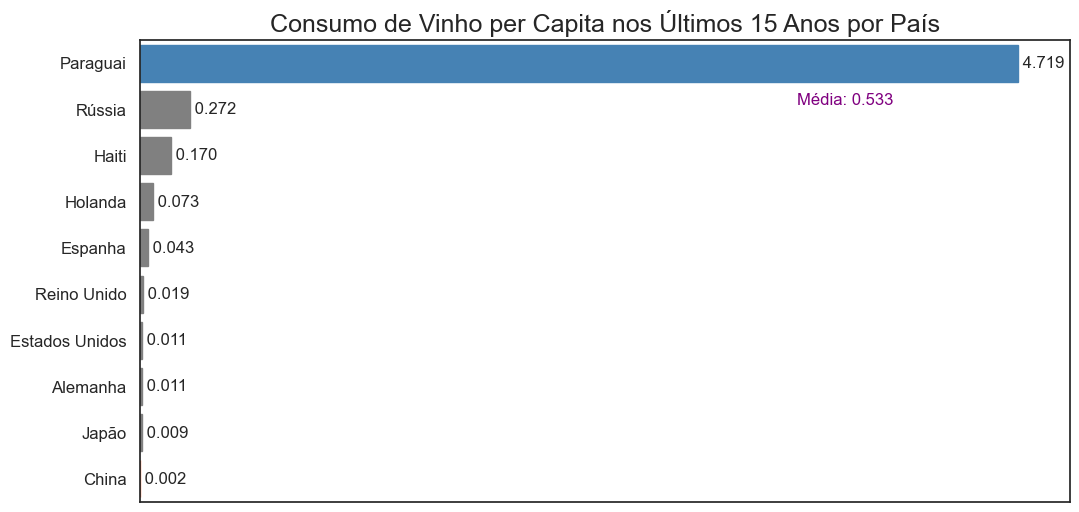

In [51]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=top_10_paises, y='País_Destino', x='Valor_L_Per_Capita', orient='h')
for bar in ax.patches:
    if bar.get_width() == maior_valor_paises_montante_per_capita:
        bar.set_color('steelblue')    
    elif bar.get_width() == menor_valor_paises_montante_per_capita:
        bar.set_color('coral')
    else:
        bar.set_color('gray')
        
plt.text(x = top_10_paises['Valor_L_Per_Capita'].mean()+3, # coordenada x 
 y = max([h.get_height() for h in ax.patches])+0.1, # coordenada y 
 s = 'Média: {:.3f}'.format(top_10_paises['Valor_L_Per_Capita'].mean()), # rótulo
 color='purple') # cor do rótulo

xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_yticks(ticks = ytick_loc, labels = ytick_labels, fontsize = 12)
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)

ax.bar_label(ax.containers[0], fontsize=12, fmt=' %.3f')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Consumo de Vinho per Capita nos Últimos 15 Anos por País', fontsize = 18, horizontalalignment = "center")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O gráfico nos mostra que a população não está impactando tanto no consumo de vinho. A China, país mais populoso da lista, possui um consumo muito inferior em relação os nosso dois maiores consumidores (Rússia e Paraguai). Ou seja, investir em países populosos somente baseado nesse argumento, não parece uma boa ideia, é preciso avaliar outras variáveis.

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Brasil é um grande produtor de vinhos, sua posição em 2022 é a décima quinta no cenário mundial, contudo, precisamos adentrar em alguns detalhes que favoreceram a produção e exportação de vinhos brasileiros. 

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Mercosul (Mercado Comum do Sul) criado em 1991, tinha como objetivo estabelecer uma zona de livre comércio entre os países envolvidos. Como vimos neste estudo, o Paraguai é o maior importador de vinhos brasileiros, isso pode ser justificado pela formação do bloco econômico do Mercosul e pela facilidade do transporte, sendo o rodoviário o mais barato. 

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Em 2002, nasceu da parceira entre a Ibravin (Instituto Brasileiro do Vinho) e a Apex-Brasil (Agência Brasileira de Promoção de Exportações e Investimentos) a iniciativa conhecida como Wines of Brazil, que tem como objetivo principal a promoção comercial de vinhos no mercado externo. Os países-alvo desse projeto são Estados Unidos, Reino Unido e China. Esses três países marcaram presença entre os 10 maiores consumidores de vinho nos últimos quinze anos, sendo os Estados Unidos o terceiro maior em ambos montante em dólar e consumo em litros, seguido da China, e o Reino Unido como detentor da maior taxa US$/L.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Outros países apresentaram enormes consumos, como o caso da Rússia em 2009 e em 2012, e outros países apresentaram um consumo menor porém uma boa taxa US$/L, que é o caso da Alemanha e da Holanda.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dessa forma, podemos concluir que os melhores países para se continuar a investir são: Paraguai, Estados Unidos e Rússia. O Paraguai já o nosso maior consumidor, possui vantagem econômica por conta do Mercosul e vantagem geográfica para o transporte. Os Estados Unidos se mostraram um excelente consumidor e possui a quarta maior taxa US$/L, ou seja, eles pagam bem pelos vinhos brasileiros. 

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A Rússia liderou o ranking em consumo em litros de vinho, e ficou em segundo lugar no montante de exportação, porém como vimos, sua taxa US$/L é a menor dentre todos os 10 países, e seu consumo se mostrou volátil, em alguns anos ela consumiu montantes absurdos e em outros ela não consumiu nada, porém nos anos em que ela consumiu, o valor foi superior ao valor de alguns países considerando os últimos 15 anos.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Algumas ações futuras que poderão aumentar a exportação de vinho é tentar exportar para outros países que fazem parte do Mercosul e que não possuem uma boa produção própria de vinho, ou países que sejam próximos do Brasil e que podemos tirar vantagem abaixando o custo de transporte. Outra ação seria procurar explorar, no longo prazo, Alemanha e Holanda, esses dois países pagam taxas US$/L enormes, assim como o Reino Unido, mas ainda não consomem tão bem.

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
EMBRAPA UVA E VINHO: Dados da Vinicultura. Bento Gonçalves: Última modificação em 29/04/22. Disponível em: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01. Acesso em: 01 de outubro de 2023.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
MARCHETTI, Dandy. "WINES OF BRASIL PROMOVE VINHO BRASILEIRO NO SEGUNDO MAIOR MERCADO IMPORTADOR DO MUNDO"; APEX BRASIL. Disponível em: https://portal.apexbrasil.com.br/noticia/WINES-OF-BRASIL-PROMOVE-VINHO-BRASILEIRO-NO-SEGUNDO-MAIOR-MERCADO-IMPORTADOR-DO-MUNDO/. Acesso em: 26 de outubro de 2023.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
MATIAS, Átila. "Mercosul"; Brasil Escola. Disponível em: https://brasilescola.uol.com.br/geografia/mercosul.htm. Acesso em 28 de outubro de 2023.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
NUNES, Maria Helena. "Conheça a Relevância do Mercosul no Comércio Exterior Brasileiro"; Unique Consultoria Aduaneira. Disponível em: https://www.uniqueaduaneira.com.br/comercio-exterior/conheca-a-relevancia-do-mercosul-no-comercio-exterior-brasileiro/ Acesso em: 25 de outubro de 2023.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
OIV: Organization of Vine and Wine. Disponível em: https://www.oiv.int/what-we-do/data-discovery-report?oiv. Acesso em: 29 de outubro de 2023.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
PAÍSES IBGE: O site Países agrega dados de várias fontes oficiais sobre 193 países reconhecidos pela ONU. Disponível em: https://paises.ibge.gov.br/#/. Acesso em: 12 de outubro de 2023.